In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import rebound as rb

In [2]:
tup_num = 7
e_b = np.linspace(0, 0.7, tup_num)
a_p = np.linspace(1, 5, tup_num)
Np = 5
tup_list = []

for e in e_b:
    for a in a_p:
        tup_list.append((e,a,Np))

def survival(initial):    
    (eb, ap, Np) = initial

    sim = rb.Simulation()
    sim.integrator = "whfast"
    
    sim.add(m=1, hash="Binary 1")
    sim.add(m=1, a=1, e= eb, hash="Binary 2")
    
    #initializing Np massless planets
    
    for p in range(Np):
        f_plan = np.random.rand()*2*np.pi
        sim.add(m=0, a= ap, e=0, f= f_plan)
    
    #array to keep track of survival time
    sim.move_to_com()

   # directory_orbit = '/mnt/raid-cita/ksmith/ClassOrbParams/'
   # filename_orbit = f'eb{:.3f}_ap{:.3f}_Np{:.1f}.bin'.format(eb,ap,Np)
   # sim.automateSimulationArchive(directory_orbit+filename_orbit, interval=1e1, deletefile=True)

    
    #integrate
    N_times = int(100)
    N_orbit = (1e4)*2*np.pi
    times = np.linspace(0,N_orbit,N_times)
    surv = np.zeros(Np)
    
    for i, time in enumerate(times):
            sim.integrate(time, exact_finish_time=0)
            
            for num in reversed(range(2, sim.N)):
                p = sim.particles[num]
                #print(p)
                if (p.x**2 + p.y**2) > (100)**2:
                    surv[num-2] = time
                    print(f'removing planet {num}')
                    sim.remove(num)

            if sim.N==2:
                break
    surv[(surv==0)] = time
    
    print(f'simulation finished, {len(sim.particles)-2} planets remaining')
    return np.mean(surv)

In [3]:
%%time
pool = rb.InterruptiblePool(processes=16)
mapping = pool.map(func= survival, iterable= tup_list)

removing planet 6
removing planet 5
removing planet 6
removing planet 5
removing planet 4
removing planet 4
removing planet 3
removing planet 3
removing planet 2
removing planet 2
simulation finished, 0 planets remaining
simulation finished, 0 planets remaining
removing planet 6
removing planet 5
removing planet 4
removing planet 3
removing planet 2
simulation finished, 0 planets remaining
removing planet 6
removing planet 5
removing planet 4
removing planet 3
removing planet 2
simulation finished, 0 planets remaining
removing planet 6
removing planet 5
removing planet 4
removing planet 3
removing planet 2
simulation finished, 0 planets remaining
removing planet 6
removing planet 5
removing planet 4
removing planet 3
removing planet 2
simulation finished, 0 planets remaining
removing planet 6
removing planet 4
removing planet 3
removing planet 3
removing planet 2
simulation finished, 0 planets remaining
removing planet 5
removing planet 3
removing planet 2
removing planet 6
removing pl

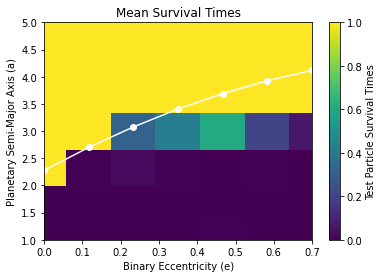

In [4]:
fig = plt.figure()
figure = np.reshape(mapping, [tup_num,tup_num])

plt.pcolormesh(e_b, a_p, figure.T, shading='auto')
plt.title('Mean Survival Times')
plt.xlabel('Binary Eccentricity (e)')
plt.ylabel('Planetary Semi-Major Axis (a)')
plt.xlim(0.0,0.7)
plt.ylim(1,5)

a_b = 2.278 + 3.824*e_b - 1.71*(e_b**2)
plt.plot(e_b, a_b, color='white')
plt.scatter(e_b, a_b, color='white')

plt.colorbar(label='Test Particle Survival Times')

In [ ]:
#with open('eb0.0_ap5.0__Np15.bin', 'rb') as f:
#    b = f.read()

#sa = rb.SimulationArchive("eb0.7_ap5.0__Np15.bin")

In [ ]:
sa = rb.SimulationArchive('eb0.0_ap5.0__Np15.bin')
print("Number of snapshots: %d" % len(sa))
print(sa[0].N)

In [ ]:
sa1 = rb.SimulationArchive('eb0.700_ap4.000_Np7.0.bin')
print("Number of snapshots: %d" % len(sa1))
print(sa1[1].t)

In [ ]:
# Functions to Plot Orbital evolution of Individual Planets

#snap is in idices 

def orbit(archive):
    sim_arc = rb.SimulationArchive(archive)
    
    x_arr = []
    y_arr = []
    
    for snap in range(len(sim_arc)): 
        
        for i in range(2, sim_arc[snap].N):
            base = sim_arc[snap].particles[i]
        
            orb_element = base.x
            time = sim_arc[snap].t
        
            y_arr.append(orb_element)
            x_arr.append(time)
    
    fig = plt.figure()
    #plt.plot(x_arr,y_arr)
    plt.scatter(x_arr,y_arr)
    print(y_arr)

In [ ]:
orbit('eb0.700_ap4.000_Np7.0.bin')